In [64]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Read the CSV and Perform Basic Data Cleaning

In [66]:
df = pd.read_csv(r'C:\Users\earth\Desktop\final_project\filled_final_table.csv')
df.head()


,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks
0,2022-06,2022,Alamance,382500,298,18,452,12,108,2112,443362,644,NaN,5.52,NaN,0.034063,54.0
1,2022-06,2022,Alexander,312450,34,35,28,0,20,1942,370648,59,NaN,5.52,NaN,0.016428,25.0
2,2022-06,2022,Alleghany,389000,54,39,24,0,20,1904,422802,92,NaN,5.52,NaN,-0.038200,0.0
3,2022-06,2022,Anson,170000,22,34,16,0,8,1502,262240,48,NaN,5.52,NaN,0.218638,3.0
4,2022-06,2022,Ashe,485000,76,31,48,0,20,1907,592879,137,NaN,5.52,NaN,-0.088346,5.0


In [67]:
#conditional based column = np.where(df['median_listing_price_mm'] (x>=0), 'up(1)', 'down(0)')
df['Price_Status'] = np.where(df['median_listing_price_mm']>=0, 'up', 'down')
df['violent_crime_rate']= df['violent_crime_rate'].str.replace(',','').astype(float)
df.head()

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2022-06,2022,Alamance,382500,298,18,452,12,108,2112,443362,644,NaN,5.52,NaN,0.034063,54.0,up
1,2022-06,2022,Alexander,312450,34,35,28,0,20,1942,370648,59,NaN,5.52,NaN,0.016428,25.0,up
2,2022-06,2022,Alleghany,389000,54,39,24,0,20,1904,422802,92,NaN,5.52,NaN,-0.038200,0.0,down
3,2022-06,2022,Anson,170000,22,34,16,0,8,1502,262240,48,NaN,5.52,NaN,0.218638,3.0,up
4,2022-06,2022,Ashe,485000,76,31,48,0,20,1907,592879,137,NaN,5.52,NaN,-0.088346,5.0,down


In [68]:
df_new1 = df.drop(['Date'], axis=1)
df_new1.dtypes

Year                         int64
County                      object
median_listing_price         int64
active_listing_count         int64
median_days_on_market        int64
new_listing_count            int64
price_increased_count        int64
price_reduced_count          int64
median_square_feet           int64
average_listing_price        int64
total_listing_count          int64
violent_crime_rate         float64
30_Year_Fixed_Rate         float64
Number_of_Schools          float64
median_listing_price_mm    float64
Number_of_Parks            float64
Price_Status                object
dtype: object

In [69]:
df_new1["Year"].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016], dtype=int64)

In [70]:
filter_df = df_new1[df_new1['Year'] <2019]
#filter_df["Year"].unique()

In [71]:

columns = [
      "County", 
    "active_listing_count", "median_days_on_market", "new_listing_count",
    "price_increased_count", "price_reduced_count", "median_square_feet",
    "total_listing_count", "violent_crime_rate","30_Year_Fixed_Rate", 
     "Price_Status"]

target = ["Price_Status"]

In [72]:
# Load the data

df_data = filter_df.loc[:, columns].copy()
df_data = df_data.dropna()

df_data.reset_index(inplace=True, drop=True)

df_data.head()
len(df_data)

2610

Split the Data into Training and Testing

In [73]:
# Create our features
X = df_data.drop('Price_Status', axis=1)

X = pd.get_dummies(X)

# Create our target
y = df_data.loc[:, target].copy()



In [74]:
# Check the balance of our target values
y.value_counts()

Price_Status
up              1448
down            1162
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1) 
                                                 
X_test.shape


(653, 101)

Balanced Random Forest Classifier¶

In [76]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, max_depth=6,min_samples_split=4, random_state=1) 
rf_model = rf_model.fit(X_train, y_train)
Counter(y_train['Price_Status'])

Counter({'down': 864, 'up': 1093})

In [77]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[118, 180],
       [120, 235]], dtype=int64)

In [78]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)



0.5289724926741658

In [52]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       1.00      0.87      0.93       616
          up       0.31      0.97      0.47        37

    accuracy                           0.88       653
   macro avg       0.66      0.92      0.70       653
weighted avg       0.96      0.88      0.90       653



In [53]:
# List the features sorted in descending order by feature importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)





[(0.3820647347747226, '30_Year_Fixed_Rate'),
 (0.08659047693049057, 'median_days_on_market'),
 (0.06182062882850594, 'Number_of_Schools'),
 (0.05919207591271836, 'Number_of_Parks'),
 (0.04936259179336397, 'price_reduced_count'),
 (0.0459615730856973, 'total_listing_count'),
 (0.04540999573140914, 'new_listing_count'),
 (0.04455586520716909, 'active_listing_count'),
 (0.04340714584807037, 'median_square_feet'),
 (0.042966634459646415, 'violent_crime_rate'),
 (0.02213751142432413, 'price_increased_count'),
 (0.0032923807331366756, 'County_Transylvania'),
 (0.003032730941857903, 'County_Columbus'),
 (0.0025534577733524427, 'County_Brunswick'),
 (0.0023724637339471526, 'County_Burke'),
 (0.002240465128401116, 'County_Lincoln'),
 (0.0020770470744033683, 'County_Duplin'),
 (0.002061767438041213, 'County_Robeson'),
 (0.0020377998864000847, 'County_Franklin'),
 (0.0020044767857511033, 'County_Onslow'),
 (0.0019985478844473017, 'County_Granville'),
 (0.001930858270052461, 'County_Cumberland'),


# Hypertune features

In [54]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train, y_train)

Counter(y_resampled['Price_Status'])

Counter({'down': 1838, 'up': 1838})

In [55]:
# Train the random forest classifier model using the resampled data
model_SMOTE =rf_model

model_SMOTE.fit(X_resampled, y_resampled)

BalancedRandomForestClassifier(max_depth=6, min_samples_split=4,
                               n_estimators=1000, random_state=1)

In [56]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[552,  64],
       [  4,  33]], dtype=int64)

In [57]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.893997893997894

In [58]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        down       0.99      0.90      0.94       616
          up       0.34      0.89      0.49        37

    accuracy                           0.90       653
   macro avg       0.67      0.89      0.72       653
weighted avg       0.96      0.90      0.92       653



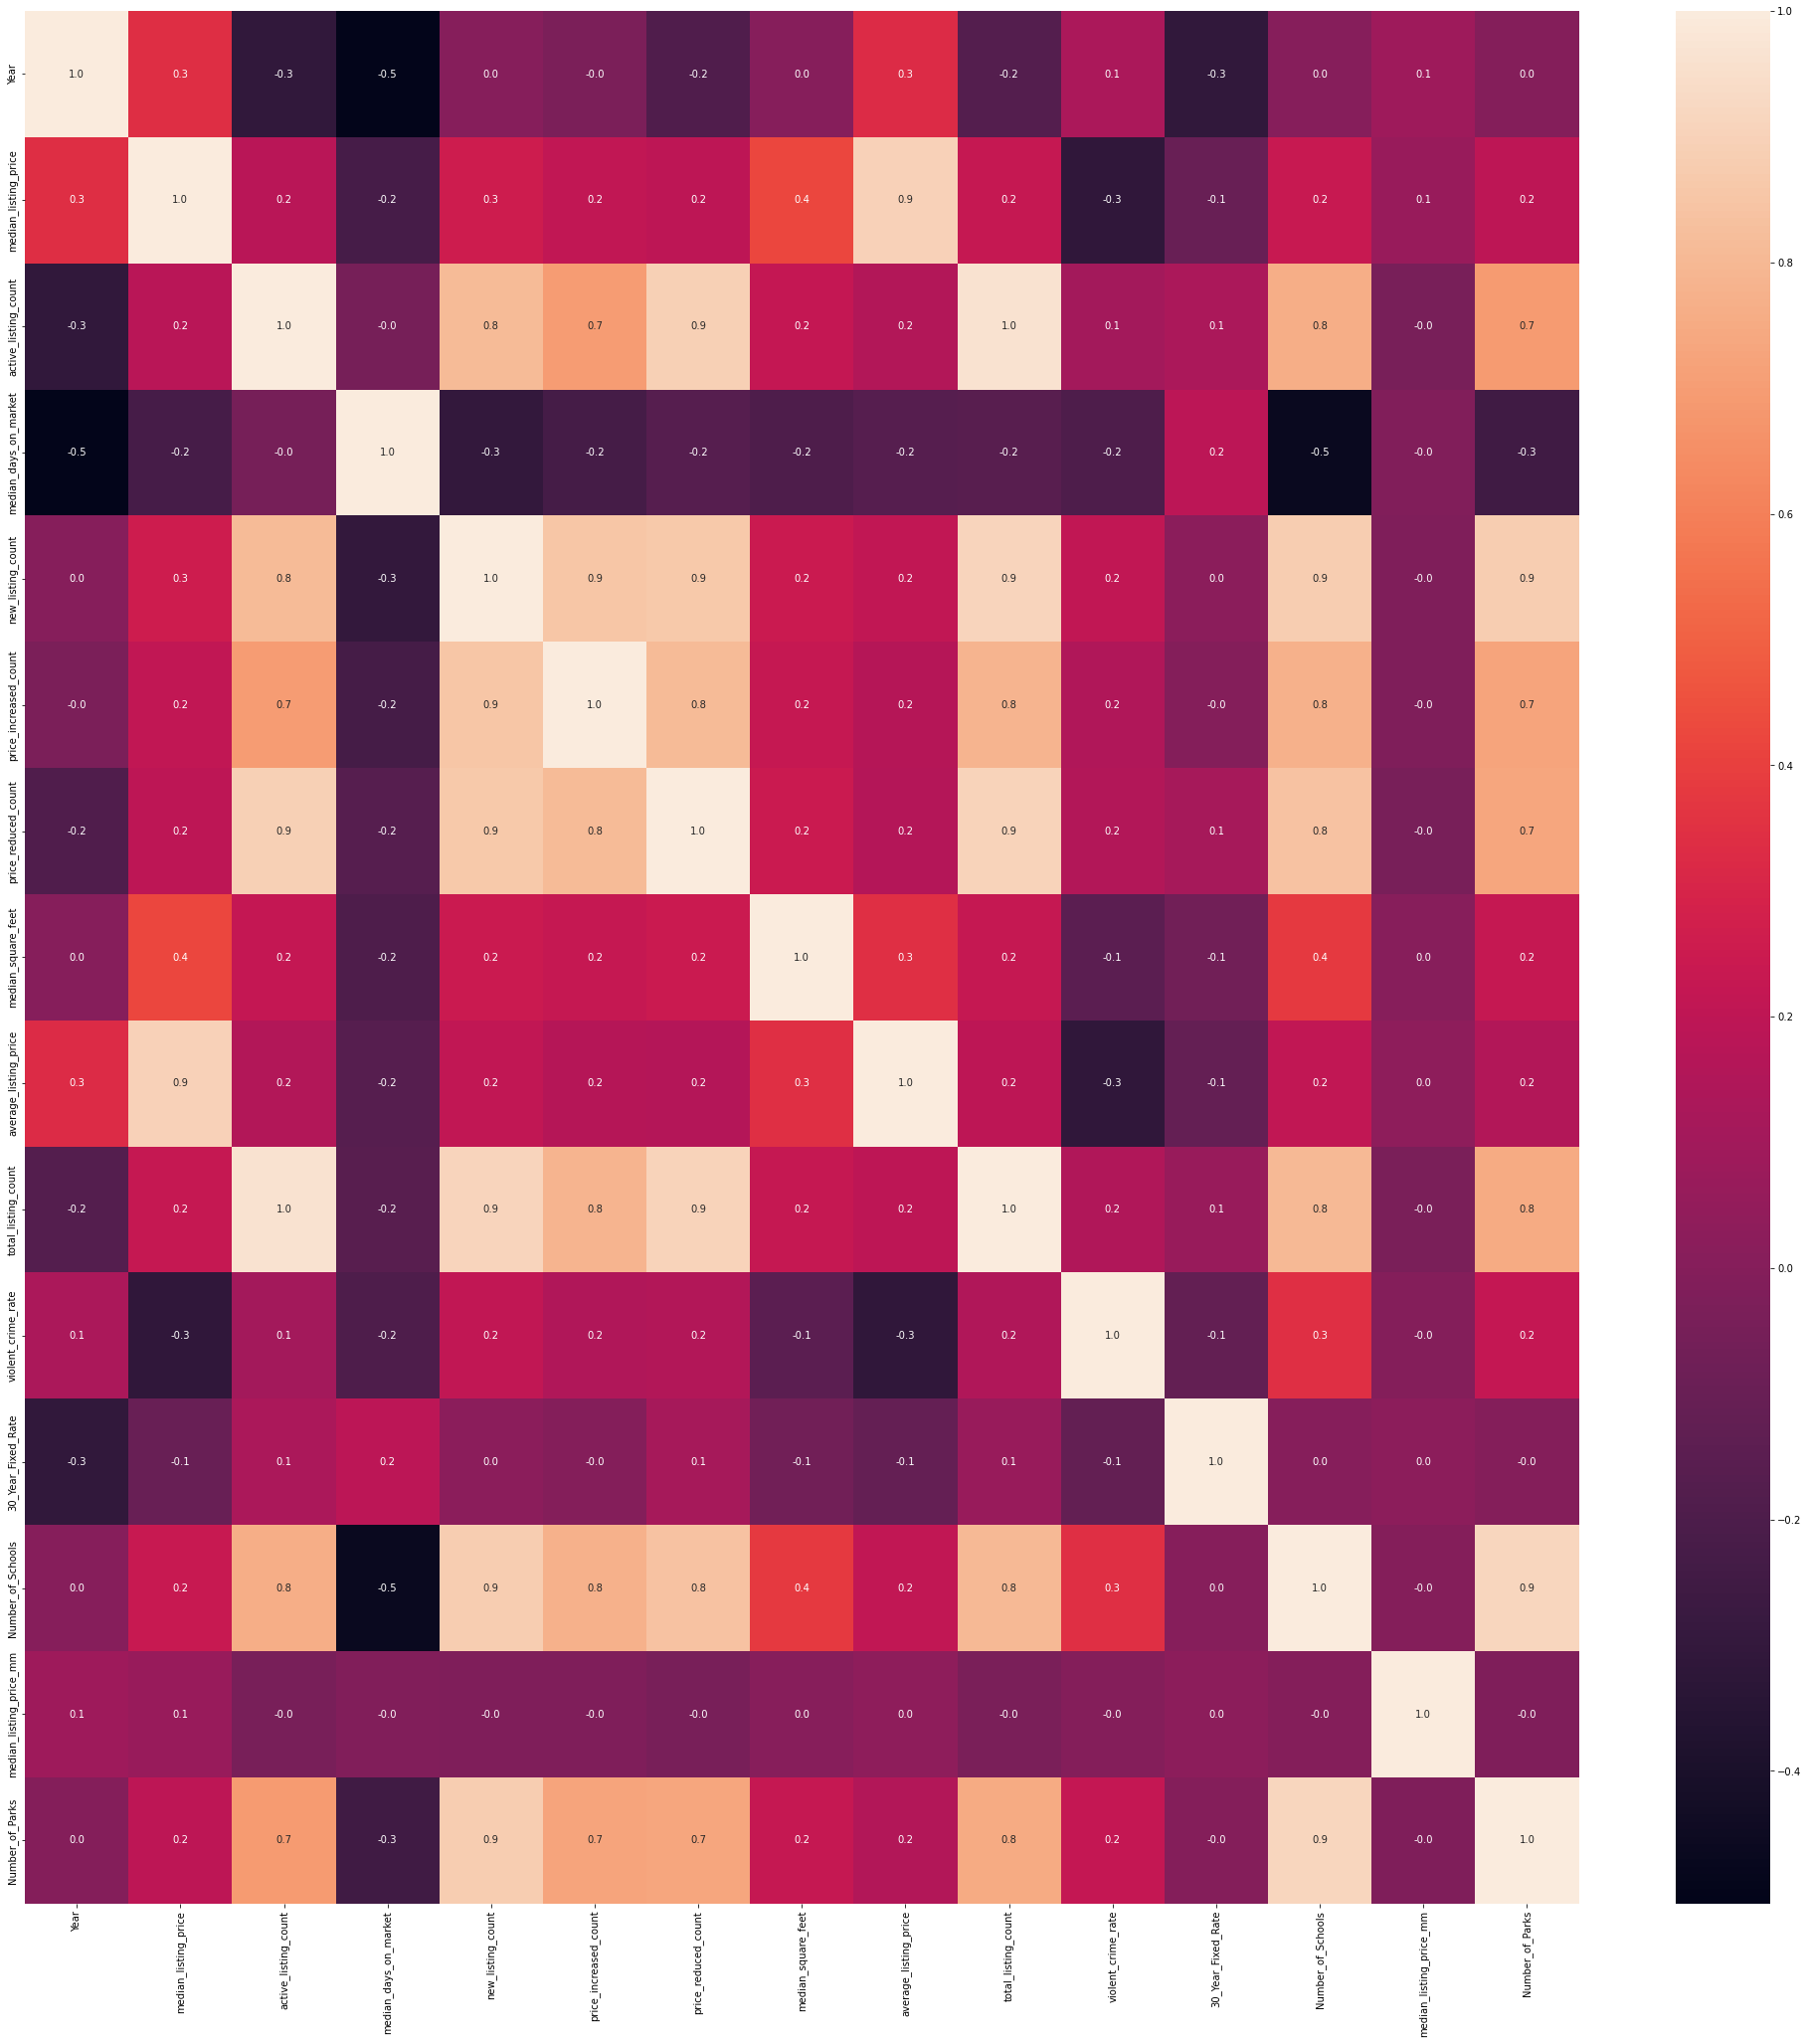

In [59]:
# heat map of feature correlation
plt.rcParams['figure.figsize']=35,35
g = sns.heatmap(df.corr(),annot=True, fmt = ".1f")

<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

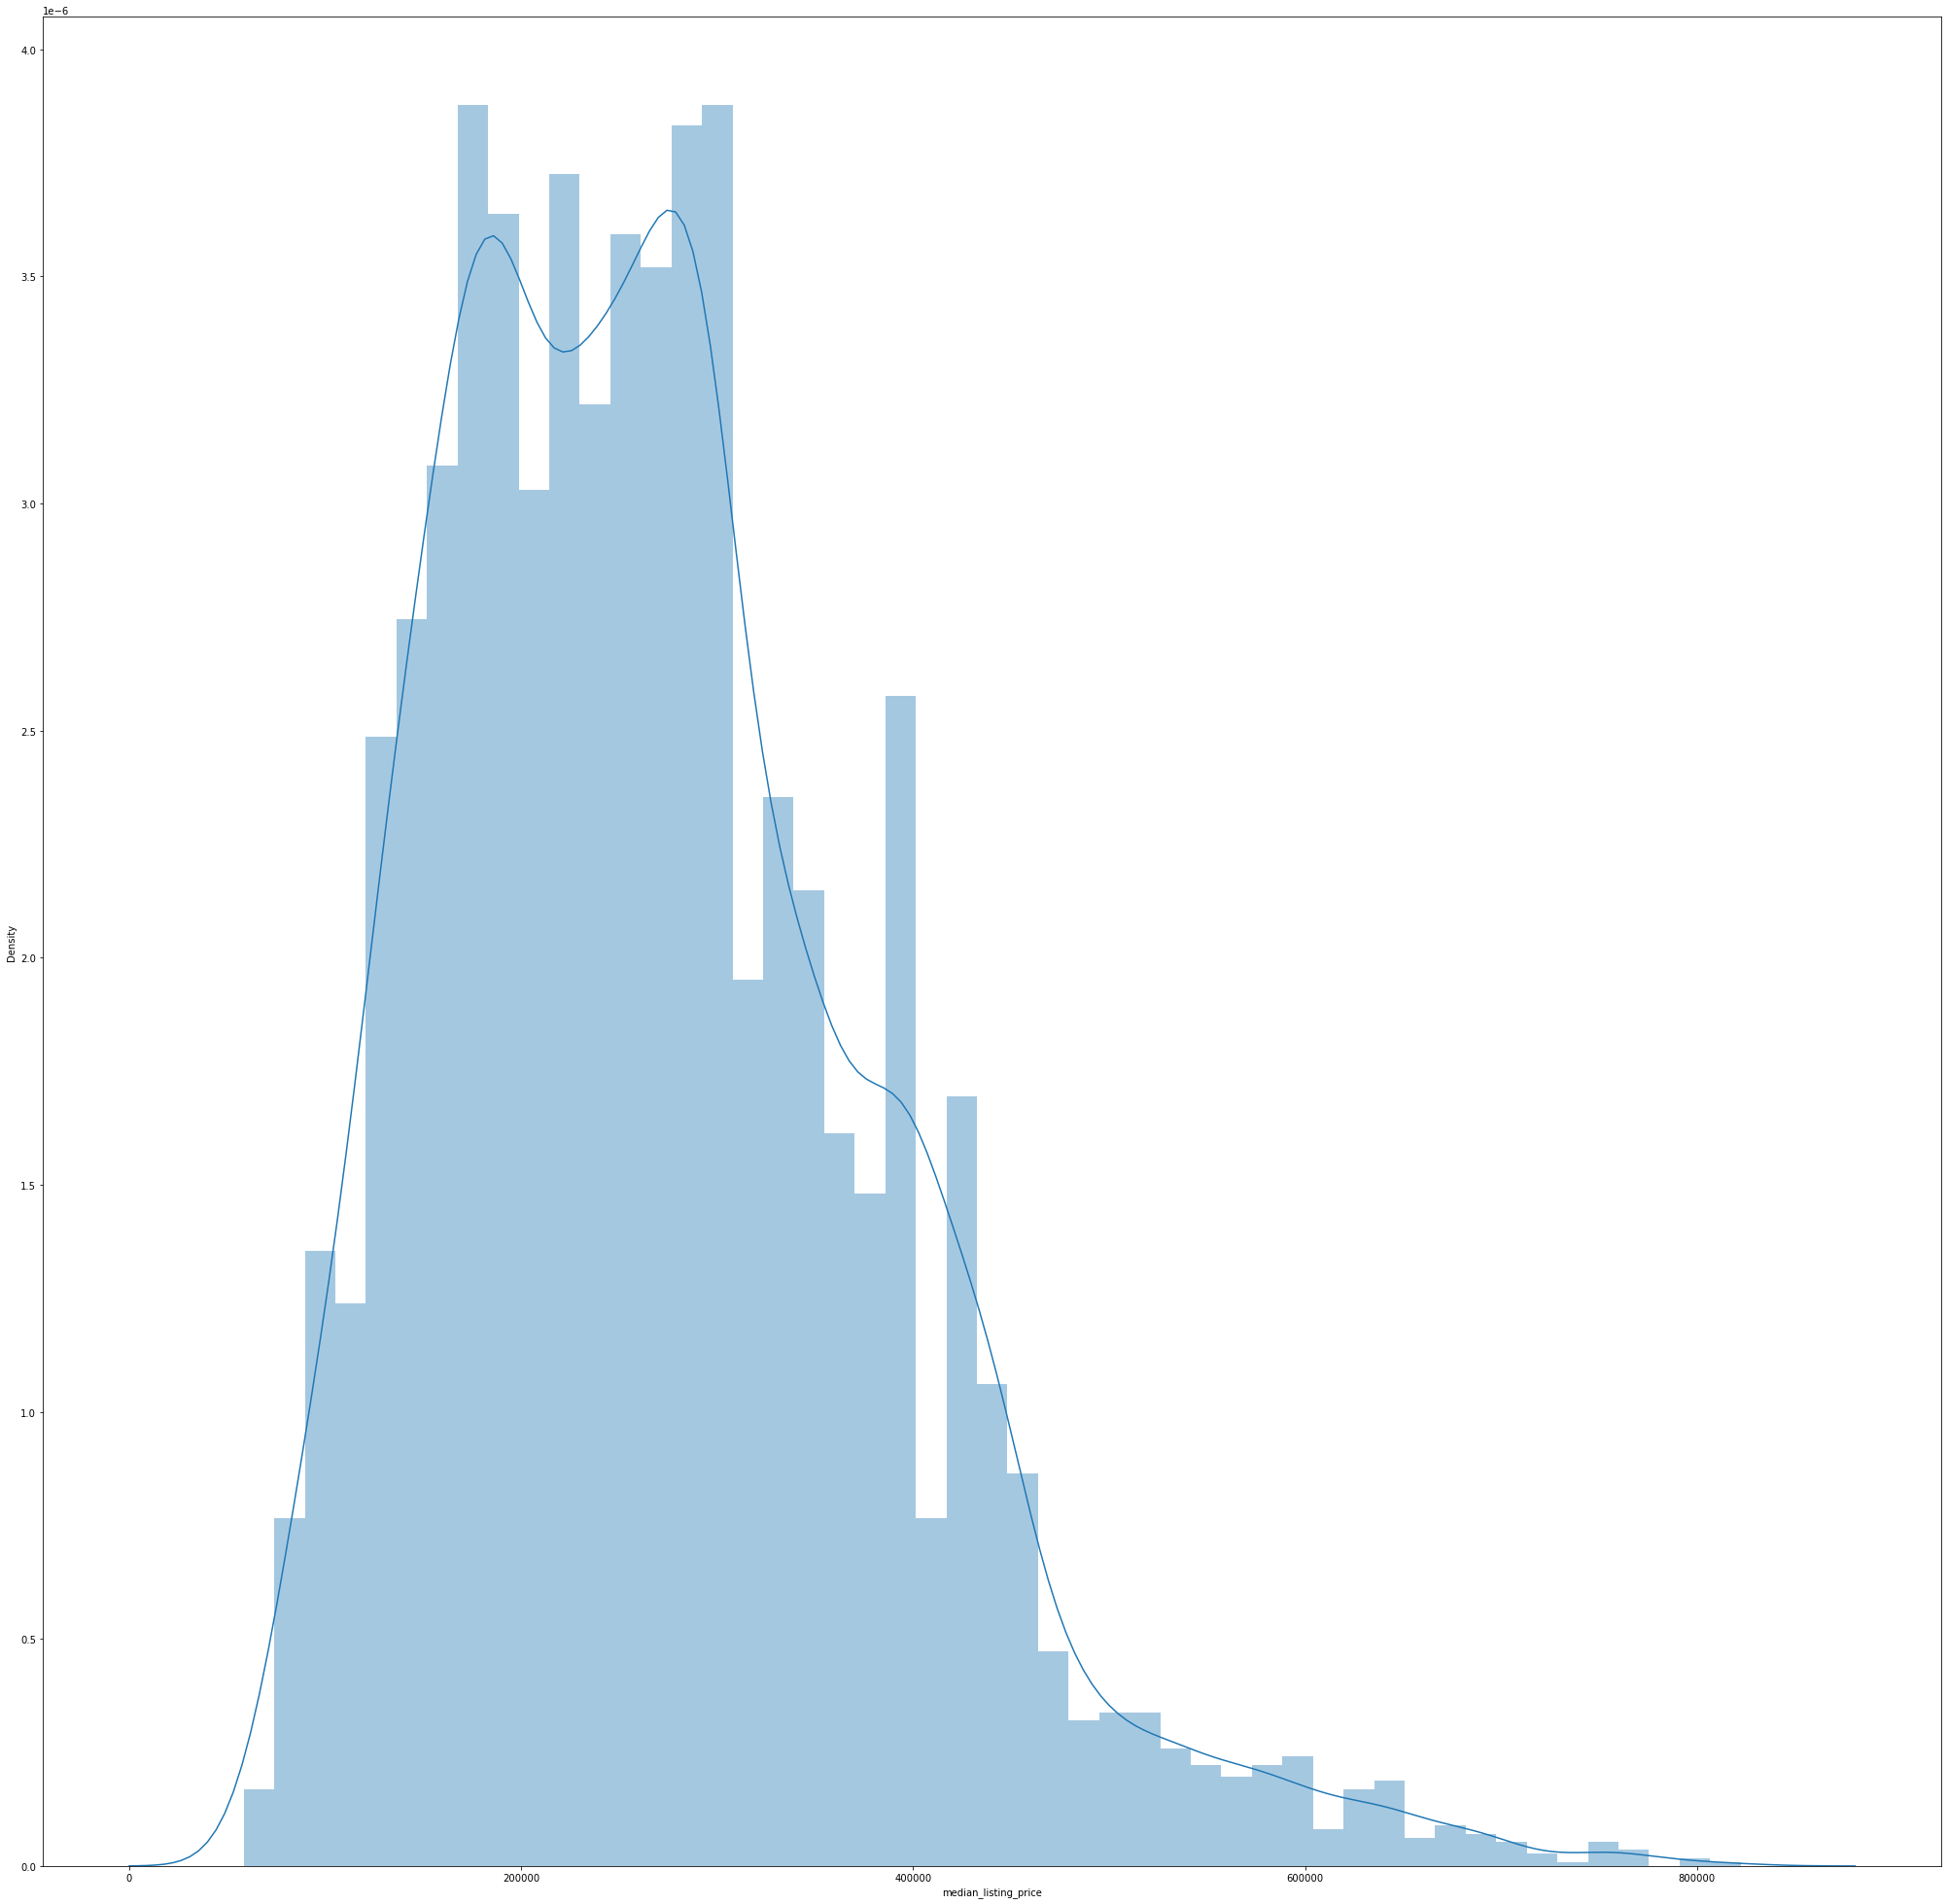

In [60]:
# distribution plot of column
sns.distplot(df['median_listing_price'])

In [ ]:
# convert Price_class to numeric, distribution of median_listing_price increase|decrease month/month
df['Price_Status'] = df['Price_Status'].replace(['up','down'],['1','0'])
sns.distplot(df['Price_Status'])

In [ ]:
# Reference code for heatmaps :https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners

# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["median_listing_price"])>0.30]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="mako")

In [ ]:
# seaborn linear regression fit: median listing price vs median square feet
sns.jointplot(data=df, x="median_listing_price", y="median_square_feet", kind="reg")

# outliers present

In [ ]:
#median_listing_price vs average listing price
sns.jointplot(data=df, x="median_listing_price", y="average_listing_price", kind="reg")

In [ ]:
# seaborn linear regression fit: median listing price vs median square feet
sns.jointplot(data=df, x="median_listing_price", y="violent_crime_rate", kind="reg")

In [ ]:
#median listing price vs Year
sns.jointplot(data=df, x="median_listing_price", y="Year", kind="reg")

In [ ]:
# Find Missing Ratio of Dataset
# reference: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
#percent_missing = df.isnull().sum() * 100 / len(df)
#missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 #'percent_missing': percent_missing})
#missing_value_df

In [ ]:
# reference
# https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook
#https://www.kaggle.com/code/erick5/predicting-house-prices-with-machine-learning/notebook

In [ ]:
# dict of county names with values
#county_names = df.County.unique()
#county_di = dict(zip(county_names, range(len(county_names))))
#county_di

In [ ]:
# county names with #'s'
#df_new = df.copy()
#df_new['County'].replace(county_di, inplace=True)
#df_new.head()

In [ ]:
#df_new.to_csv("c:/tmp/courses.csv",header=False)

In [ ]:
# copy the data
#df_max_scaled = df_data.copy()
  
# apply normalization techniques
#for column in df_max_scaled.columns:
    #df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
#display(df_max_scaled)

In [ ]:
import tensorflow as tf